In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import pyro
import deepppl

In [4]:
import torch


### Basic example showing the interface of *DeepPPL*
The model impose a uniform prior to the bias of the coin and define each coin flip as a bernoulli distribution given the bias 


In [5]:
sns.set_style('whitegrid')

```stan
data {
  int<lower=0,upper=1> x[10];
}
parameters {
  real<lower=0,upper=1> theta;
}
model {
  theta ~ uniform(0.0,1.0);
  for (i in 1:10)
    x[i] ~ bernoulli(theta);
}
```

In [6]:
model = deepppl.PyroModel(model_file = '../tests/good/coin.stan')

ANTLR runtime and generated code versions disagree: 4.7.2!=4.8
ANTLR runtime and generated code versions disagree: 4.7.2!=4.8


In [7]:
mcmc = model.mcmc(num_samples=500, warmup_steps=50)
mcmc.run(x=[0, 0, 0, 0, 0, 0, 1, 0, 0, 1])
serie = mcmc.get_samples()['theta']

Sample: 100%|██████████| 550/550 [00:13, 41.93it/s, step size=7.48e-01, acc. prob=0.973]


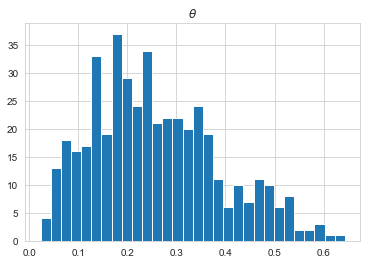

In [8]:
serie = pd.Series(mcmc.get_samples(), name = r'$\theta$')
serie.hist(bins=30)
plt.title(serie.name);